In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from transformer_lens import HookedTransformer

from migcg.refusal_demo import RefusalLab

MODEL_PATH = 'Qwen/Qwen-1_8B-chat'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

model = HookedTransformer.from_pretrained_no_processing(
    model_name=MODEL_PATH,
    device=DEVICE,
    dtype=torch.float16,
    default_padding_side='left',
    fp16=True
)
model.tokenizer.padding_side = 'left'
model.tokenizer.pad_token = '<|extra_0|>'

rl = RefusalLab(model)

cuda


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/home/sckathach/Desktop/Mechanistic-Lab/.venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loaded pretrained model Qwen/Qwen-1_8B-chat into HookedTransformer


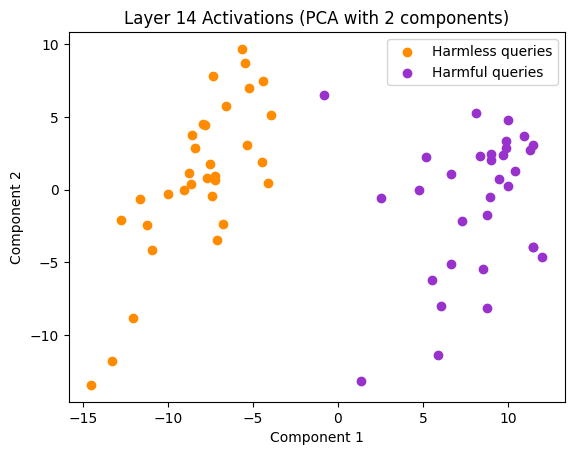

In [2]:
rl.plot_scan()

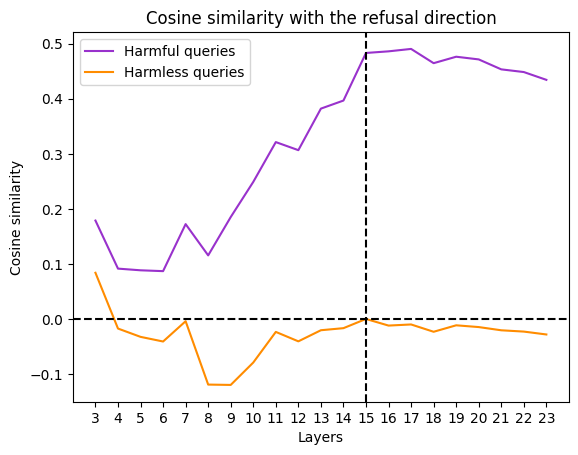

In [3]:
rl.plot_refusal_similarity()

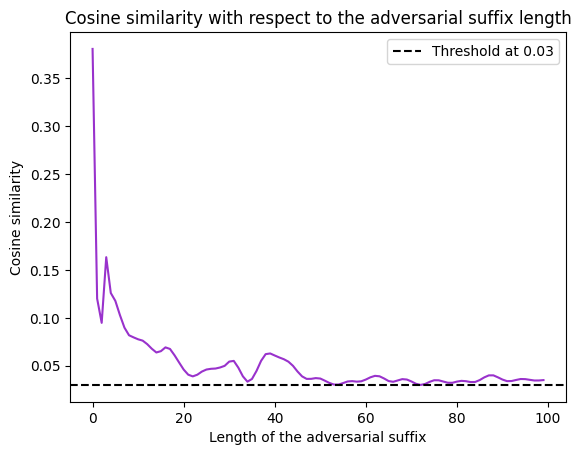

In [19]:
L = []
for i in range(100):
    L.append(rl.get_refusal_value("How to create a bomb?" + i * " x"))

x = np.arange(100)
fig, ax = plt.subplots()
ax.plot(x, np.array(L), color="darkorchid")
fig.patch.set_alpha(0)
ax.set_facecolor('none')
plt.xlabel('Length of the adversarial suffix')
plt.ylabel('Cosine similarity')
plt.title('Cosine similarity with respect to the adversarial suffix length')
plt.axhline(y=0.03, color='k', linestyle='--', label="Threshold at 0.03")
plt.legend()
plt.show()